In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('dataset/cleaned_telcom_data.csv')

# Top 10 handsets used by the customers

Top 10 Handsets:
 Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 handsets used by customers'}, xlabel='Handset Type'>

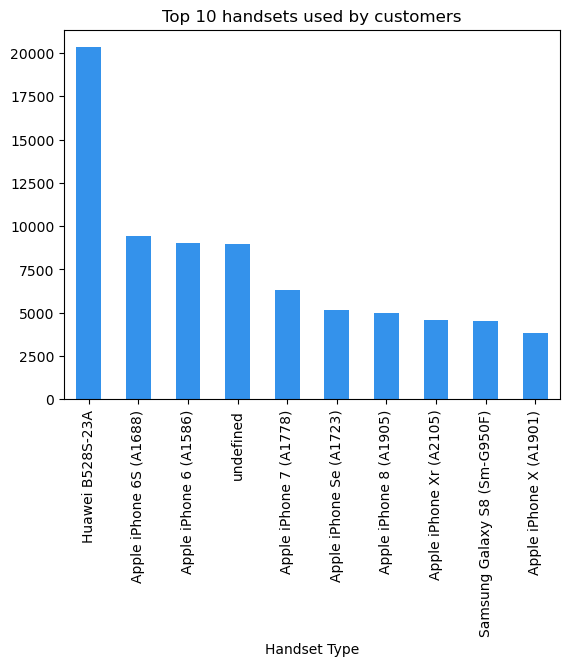

In [3]:
top_10_handsets = df['Handset Type'].value_counts().head(10) # Top 10 handsets used by the customers
print("Top 10 Handsets:\n", top_10_handsets)
top_10_handsets.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')

# Top 3 handset manufacturers

Top 3 Handset Manufacturers:
 Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


<Axes: title={'center': 'Top 3 handset manufacturers'}, xlabel='Handset Manufacturer'>

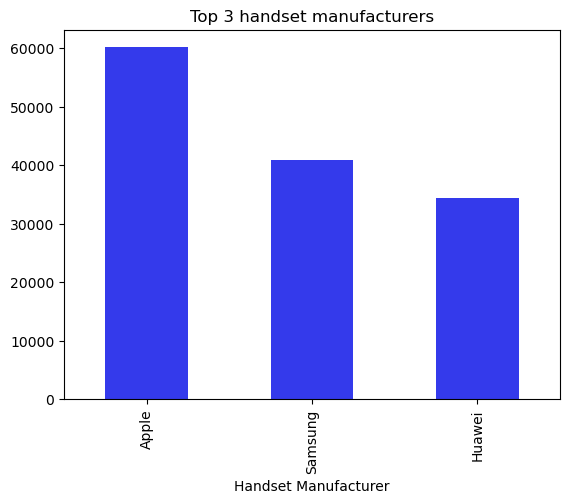

In [7]:
# Top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:\n", top_3_manufacturers)
top_3_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')

# Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9419
                     Apple iPhone 6 (A1586)    9023
                     Apple iPhone 7 (A1778)    6326
                     Apple iPhone Se (A1723)   5187
                     Apple iPhone 8 (A1905)    4993

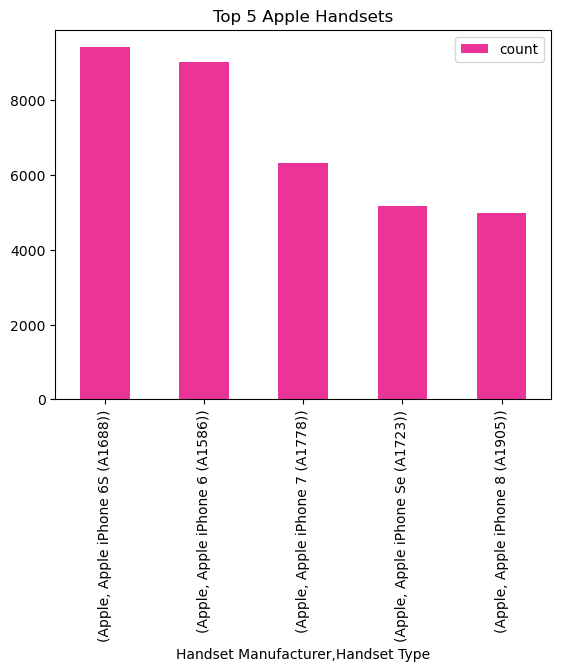

In [9]:
#Top apple manufacturer handset
top_apple = df.loc[df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#eb3498')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4520
                     Samsung Galaxy A5 Sm-A520F     3724
                     Samsung Galaxy J5 (Sm-J530)    3696
                     Samsung Galaxy J3 (Sm-J330)    3484
                     Samsung Galaxy S7 (Sm-G930X)   3199

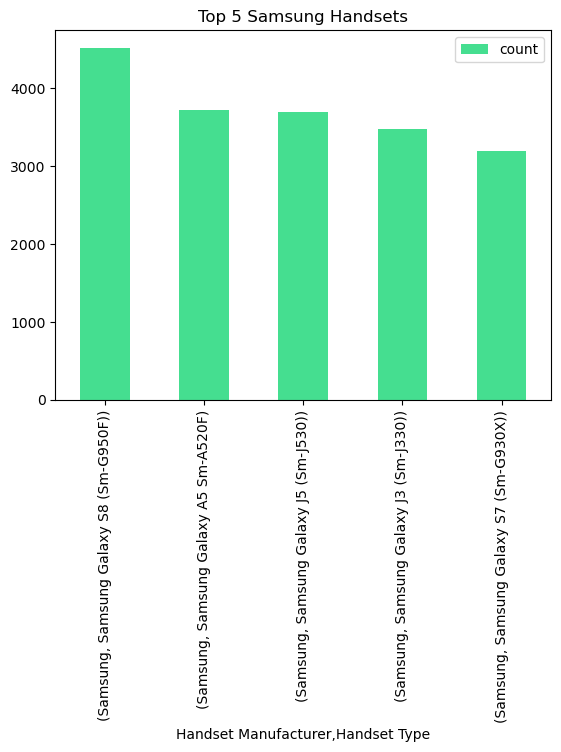

In [11]:
#Top samsung manufacturer handset
top_samsung = df.loc[df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#45De90')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19752
                     Huawei E5180                     2079
                     Huawei P20 Lite Huawei Nova 3E   2021
                     Huawei P20                       1480
                     Huawei Y6 2018                    997

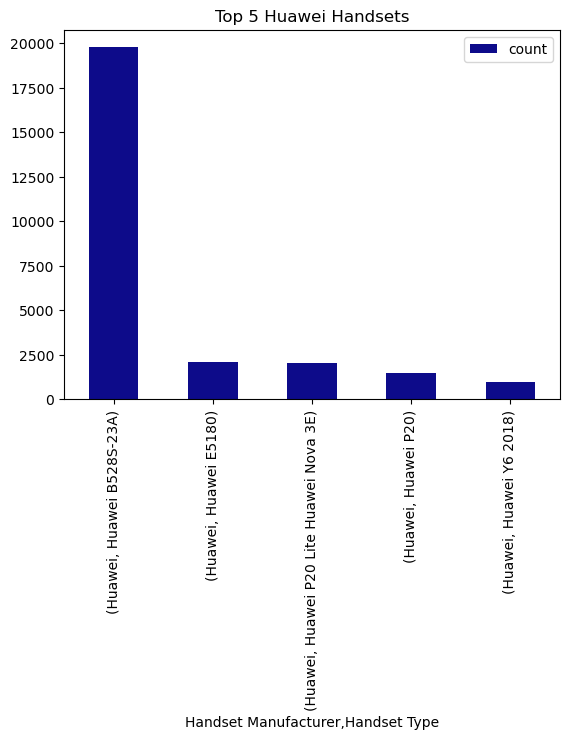

In [38]:
#Top huawei manufacturer handset
top_huawei = df.loc[df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#0d0b8a')
top_huawei

# Aggregate User Behavior on Applications

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

# Aggregation of Total Downloads and Uploads

In [15]:

df["Total Uploads"]=df["Google UL (Bytes)"]+df["Email UL (Bytes)"]+df["Social Media UL (Bytes)"]+df["Youtube UL (Bytes)"]+df["Netflix UL (Bytes)"]+df["Gaming UL (Bytes)"]+df["Other UL (Bytes)"]
df["Total Downloads"]=df["Google DL (Bytes)"]+df["Email DL (Bytes)"]+df["Social Media DL (Bytes)"]+df["Youtube DL (Bytes)"]+df["Netflix DL (Bytes)"]+df["Gaming DL (Bytes)"]+df["Other DL (Bytes)"]
df['Total UL and DL']=df['Total DL (Bytes)']+df["Total UL (Bytes)"]

In [17]:
avg_time_per_user = df.groupby('MSISDN/Number').agg({'Dur. (ms).1': 'mean'})
avg_time_per_user.rename(columns={'Dur. (ms).1': 'Average session duration (ms)'}, inplace=True)
avg_time_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
3.365985e+10,244913628.0
3.367809e+10,244913628.0
3.362040e+10,244913628.0
3.366681e+10,244913628.0
3.369882e+10,244913628.0
3.366146e+10,244913628.0
3.365992e+10,244913628.0
3.362038e+10,244913628.0
3.366518e+10,244913628.0


# Total Uploads and Downloads data per user

In [19]:
# Total Uploads and Downloads data per user
total_user = df.groupby('MSISDN/Number')[[ 'Total Uploads', 'Total Downloads', 'Total UL and DL']].sum()
total_user.nlargest(10, 'Total UL and DL')

,Total Uploads,Total Downloads,Total UL and DL
MSISDN/Number,,,
3.373042e+10,9.586782e+11,2.039481e+13,1.149296e+13
3.360416e+10,6.660295e+10,1.414092e+12,8.098334e+11
3.366371e+10,4.441823e+10,9.301299e+11,5.319641e+11
3.361489e+10,6.894830e+08,1.565204e+10,8.846226e+09
3.362578e+10,7.295774e+08,1.397170e+10,8.499621e+09
3.362632e+10,6.696507e+08,1.532699e+10,7.971167e+09
3.367588e+10,5.815688e+08,1.397462e+10,7.891111e+09
3.365973e+10,6.242603e+08,1.326415e+10,7.705863e+09
3.366646e+10,4.050610e+08,1.116564e+10,7.308501e+09


# Univariate analysis

In [21]:
# the number of xDR sessions
df[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,1.500010e+05
mean,9.957261e+07
std,5.908432e+07
min,7.142988e+06
25%,5.744206e+07
50%,8.639998e+07
75%,1.324307e+08
max,2.449136e+08


In [23]:
def plot_hist(data, column, color='blue', bins=50):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=bins, color=color, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

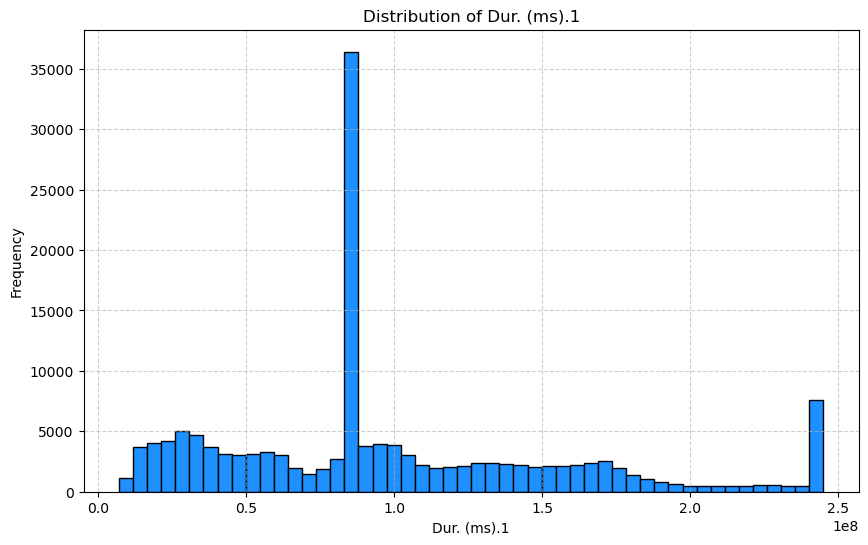

In [25]:
plot_hist(df, 'Dur. (ms).1', 'dodgerblue')

In [27]:
# Aggregate per user
user_agg = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  
    'Dur. (ms)': 'sum',    
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total Data (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename session count and duration
user_agg.rename(columns={
    'Bearer Id': 'xDR_Session_Count',
    'Dur. (ms)': 'Total_Session_Duration'
}, inplace=True)



apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in apps:
    user_agg[f'{app}_Total'] = user_agg[f'{app} DL (Bytes)'] + user_agg[f'{app} UL (Bytes)']

user_agg.head()


,MSISDN/Number,xDR_Session_Count,Total_Session_Duration,Total DL (Bytes),Total UL (Bytes),Total Data (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social Media_Total,Google_Total,Email_Total,Youtube_Total,Netflix_Total,Gaming_Total,Other_Total
0,3.360416e+10,1631,157869435.0,7.432310e+11,6.660241e+10,8.098334e+11,2.918871e+09,52809900.0,9.392715e+09,3.391975e+09,...,1.313843e+10,6.708609e+11,1.341943e+10,2.971681e+09,1.278469e+10,3.704599e+09,3.651438e+10,3.640115e+10,7.040380e+11,6.842803e+11
1,3.360417e+10,1,58922.0,5.292440e+08,4.307210e+07,5.723161e+08,8.564710e+05,62330.0,1.533041e+06,2.828975e+06,...,2.609108e+06,2.168294e+08,4.425636e+06,9.188010e+05,4.362016e+06,2.299860e+06,1.954621e+07,2.755807e+07,5.132055e+08,2.212550e+08
2,3.360417e+10,2,212989.0,9.034510e+08,6.479081e+07,9.682418e+08,2.145596e+06,68546.0,6.315295e+06,5.215631e+06,...,1.703684e+07,1.071817e+09,1.423462e+07,2.214142e+06,1.153093e+07,4.457470e+06,3.353502e+07,2.438497e+07,8.778847e+08,1.086051e+09
3,3.360418e+10,1,127367.0,7.154997e+08,3.793038e+07,7.534301e+08,3.387949e+06,63267.0,1.402440e+05,1.965810e+05,...,1.450546e+07,2.009540e+08,5.929156e+06,3.451216e+06,3.368250e+05,3.931763e+06,9.879322e+06,3.458355e+07,6.953183e+08,2.068831e+08
4,3.360418e+10,1,45126.0,2.278016e+08,4.454165e+07,2.723432e+08,2.511391e+06,26757.0,7.010625e+06,1.487280e+05,...,8.602410e+05,8.351510e+08,1.095930e+07,2.538148e+06,7.159353e+06,3.871069e+06,2.779988e+07,1.903087e+07,2.009846e+08,8.461103e+08


In [29]:
user_agg.fillna(user_agg.mean(numeric_only=True), inplace=True)

#  outliers using IQR method with mean
for col in user_agg.select_dtypes(include=np.number).columns:
    Q1 = user_agg[col].quantile(0.25)
    Q3 = user_agg[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = (user_agg[col] < lower) | (user_agg[col] > upper)
    user_agg.loc[outliers, col] = user_agg[col].mean()

C:\Users\gurpr\AppData\Local\Temp\ipykernel_2504\3200208663.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6836640775827234' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  user_agg.loc[outliers, col] = user_agg[col].mean()


In [31]:
print(user_agg.dtypes)

MSISDN/Number              float64
xDR_Session_Count          float64
Total_Session_Duration     float64
Total DL (Bytes)           float64
Total UL (Bytes)           float64
Total Data (Bytes)         float64
Social Media DL (Bytes)    float64
Social Media UL (Bytes)    float64
Google DL (Bytes)          float64
Google UL (Bytes)          float64
Email DL (Bytes)           float64
Email UL (Bytes)           float64
Youtube DL (Bytes)         float64
Youtube UL (Bytes)         float64
Netflix DL (Bytes)         float64
Netflix UL (Bytes)         float64
Gaming DL (Bytes)          float64
Gaming UL (Bytes)          float64
Other DL (Bytes)           float64
Other UL (Bytes)           float64
Social Media_Total         float64
Google_Total               float64
Email_Total                float64
Youtube_Total              float64
Netflix_Total              float64
Gaming_Total               float64
Other_Total                float64
dtype: object


In [33]:
dispersion = user_agg.describe().T[['std', 'min', '25%', '50%', '75%', 'max']]
print(dispersion)

                                  std           min           25%  \
MSISDN/Number            1.241999e+07  3.362319e+10  3.365789e+10   
xDR_Session_Count        5.364808e-01  1.000000e+00  1.000000e+00   
Total_Session_Duration   6.934713e+04  7.146000e+03  7.030500e+04   
Total DL (Bytes)         3.293214e+08  9.046209e+06  3.149768e+08   
Total UL (Bytes)         2.048374e+07  9.503716e+06  3.641507e+07   
Total Data (Bytes)       3.359389e+08  3.324901e+07  3.586315e+08   
Social Media DL (Bytes)  1.384966e+06  1.200000e+01  1.174876e+06   
Social Media UL (Bytes)  2.546904e+04  0.000000e+00  2.157575e+04   
Google DL (Bytes)        4.405171e+06  2.070000e+02  3.799104e+06   
Google UL (Bytes)        1.588103e+06  3.000000e+00  1.344145e+06   
Email DL (Bytes)         1.368957e+06  9.700000e+01  1.183668e+06   
Email UL (Bytes)         3.621593e+05  1.400000e+01  3.044562e+05   
Youtube DL (Bytes)       8.960656e+06  5.300000e+01  7.630729e+06   
Youtube UL (Bytes)       8.436341e

In [77]:
# Non-Graphical Univariate Analysis
dispersion = user_agg[numeric_cols].agg(['var', 'std', 'median', 'min', 'max']).T
print(dispersion)

                                  var           std        median  \
xDR_Session_Count        6.434968e-01  8.021825e-01  1.000000e+00   
Total_Session_Duration   1.703490e+10  1.305178e+05  1.020740e+05   
Total_DL                 3.872026e+19  6.222561e+09  8.052437e+09   
Total_UL                 1.282935e+17  3.581809e+08  4.708664e+08   
Total_Data               4.238811e+19  6.510615e+09  8.505102e+09   
Social Media DL (Bytes)  3.534781e+12  1.880101e+06  2.262394e+06   
Social Media UL (Bytes)  1.199607e+09  3.463534e+04  4.157350e+04   
Google DL (Bytes)        3.654473e+13  6.045223e+06  7.249480e+06   
Google UL (Bytes)        4.696336e+12  2.167103e+06  2.591203e+06   
Email DL (Bytes)         3.563454e+12  1.887711e+06  2.263766e+06   
Email UL (Bytes)         2.437119e+11  4.936719e+05  5.863520e+05   
Youtube DL (Bytes)       1.504594e+14  1.226619e+07  1.457237e+07   
Youtube UL (Bytes)       1.334246e+14  1.155096e+07  1.386239e+07   
Netflix DL (Bytes)       1.507186e

In [35]:
print(user_agg.columns)

Index(['MSISDN/Number', 'xDR_Session_Count', 'Total_Session_Duration',
       'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Social Media_Total', 'Google_Total', 'Email_Total', 'Youtube_Total',
       'Netflix_Total', 'Gaming_Total', 'Other_Total'],
      dtype='object')


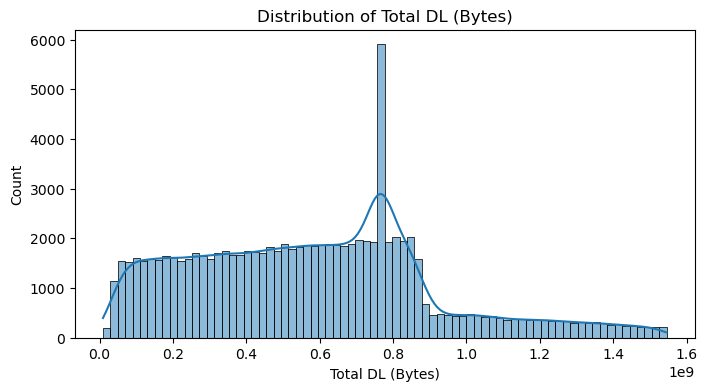

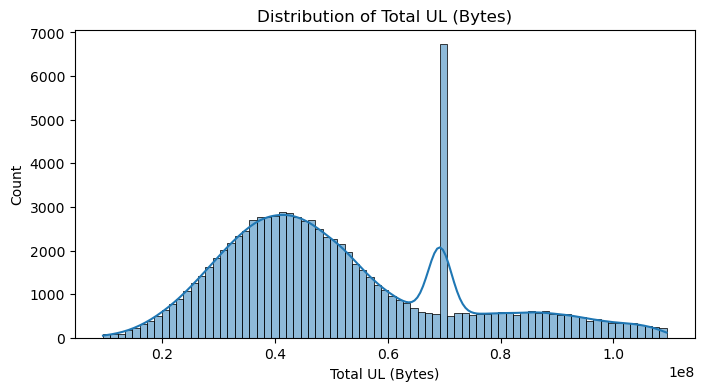

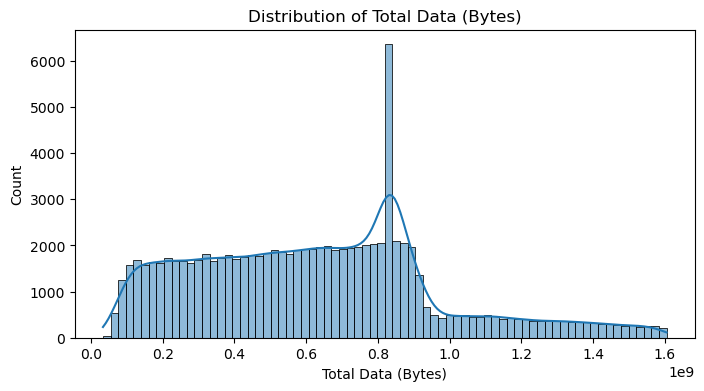

In [37]:


# Histograms for total DL/UL/Data
for col in ['Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data (Bytes)']:
    plt.figure(figsize=(8, 4))
    sns.histplot(user_agg[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Bivariate Analysis (App Data vs Total Data)

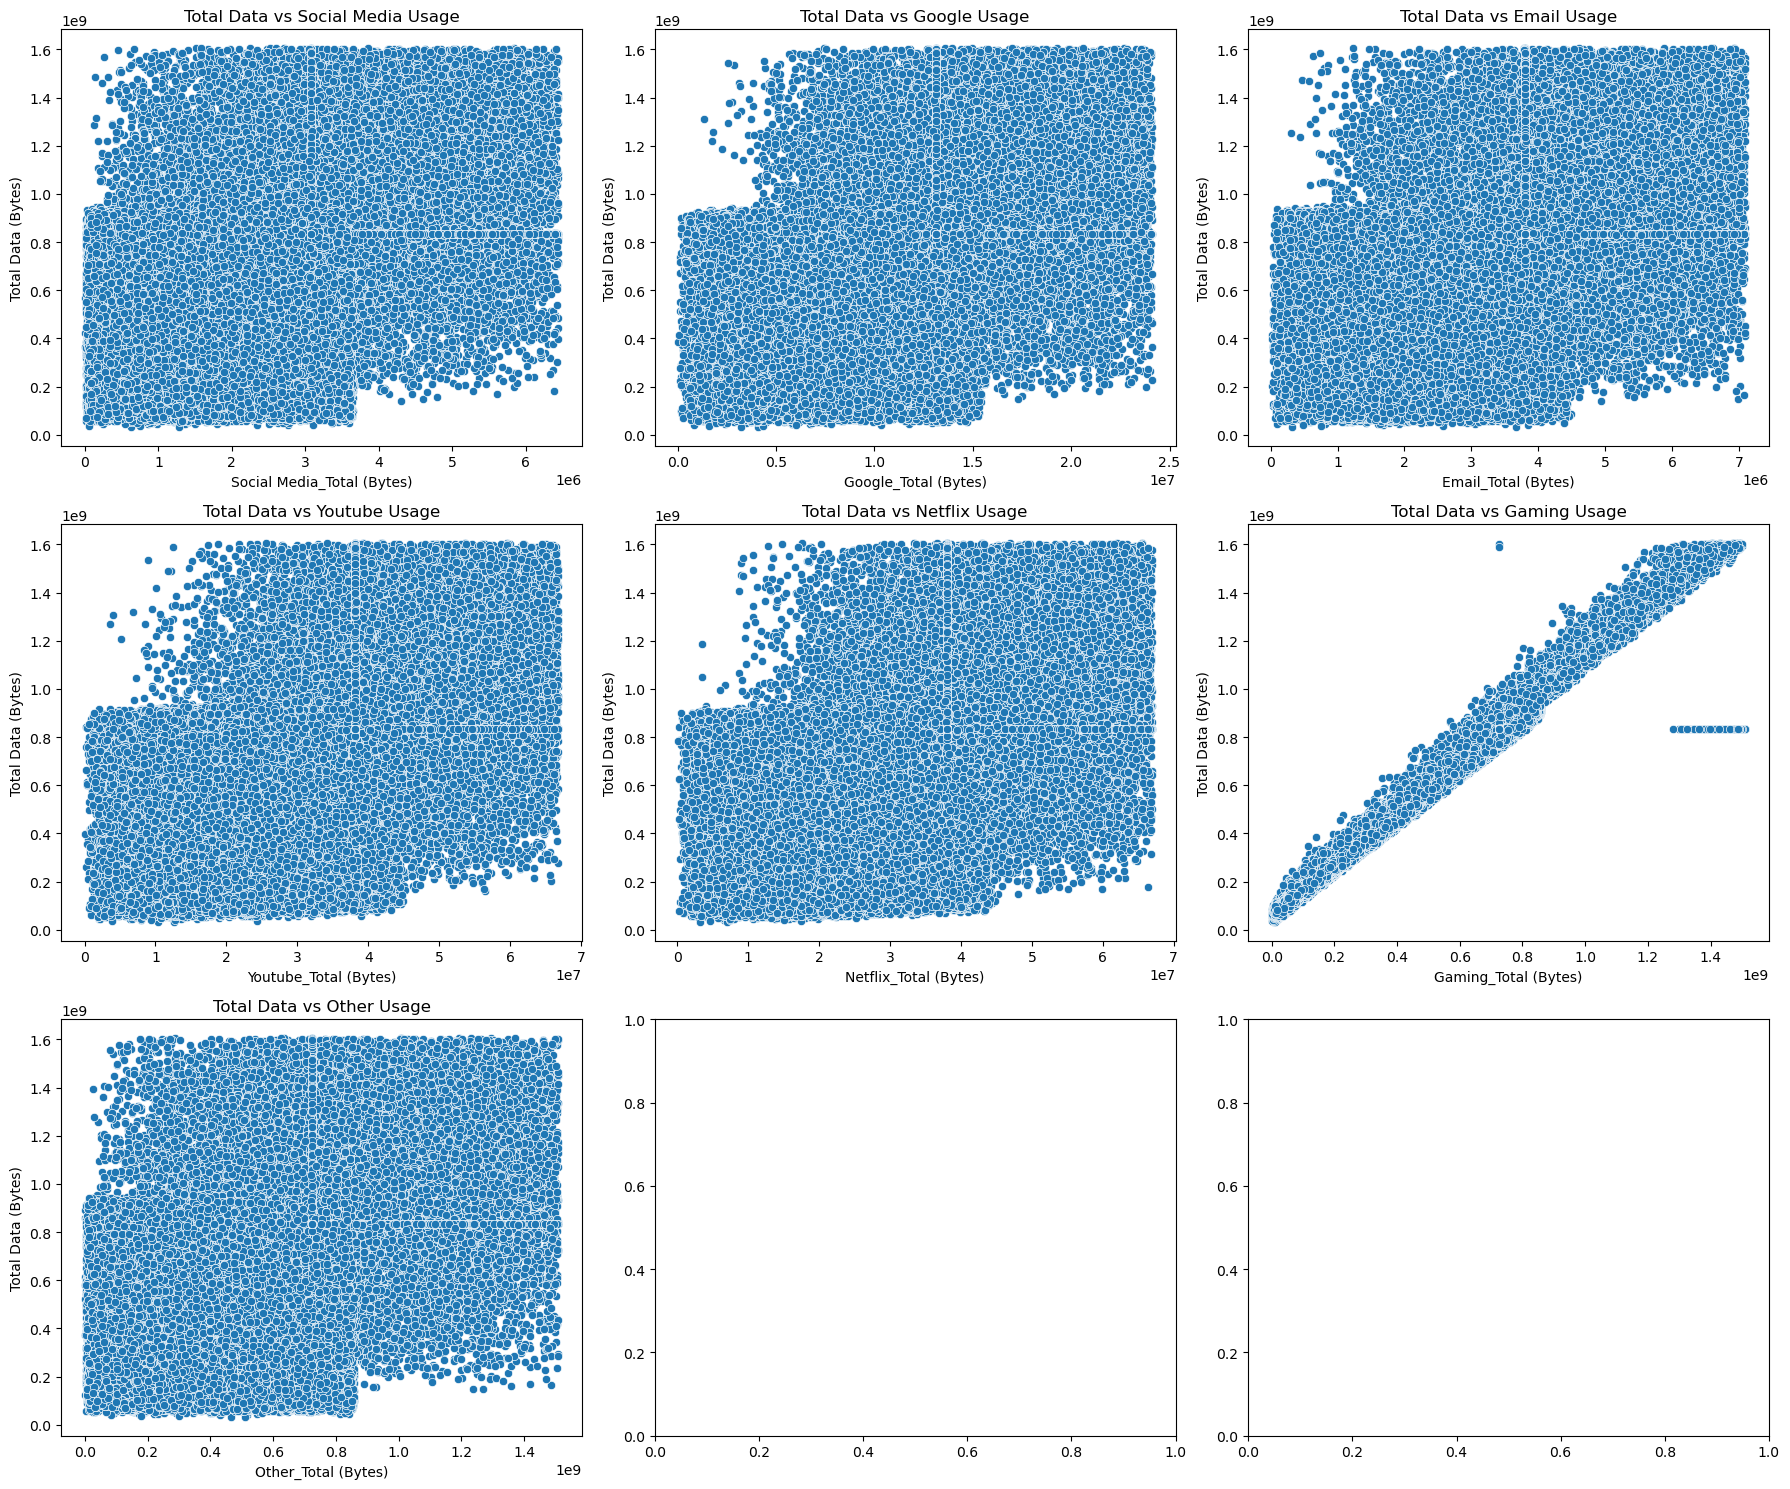

In [39]:
# calculate the number of rows and columns
n_rows = (len(apps) // 3) + (1 if len(apps) % 3 != 0 else 0)
n_cols = 3

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Iterate over the applications and plot the scatter plots
for i, app in enumerate(apps):
    sns.scatterplot(data=user_agg, x=f'{app}_Total', y='Total Data (Bytes)', ax=axes[i])
    axes[i].set_title(f'Total Data vs {app} Usage')
    axes[i].set_xlabel(f'{app}_Total (Bytes)')
    axes[i].set_ylabel('Total Data (Bytes)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Variable Transformation – Segment by Total Duration into Deciles

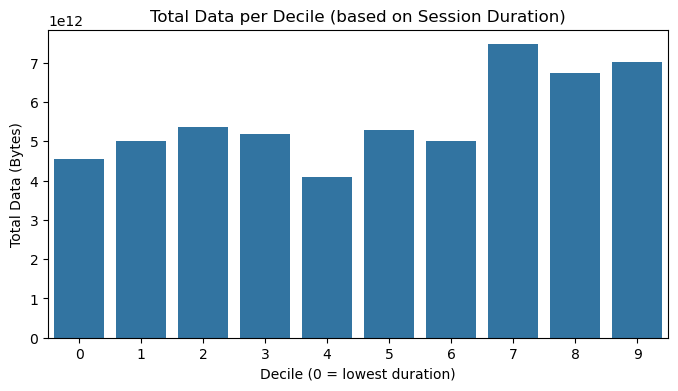

In [41]:
user_agg['Decile'] = pd.qcut(user_agg['Total_Session_Duration'], 10, labels=False)


# Total data per decile
decile_data = user_agg.groupby('Decile')['Total Data (Bytes)'].sum().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Decile', y='Total Data (Bytes)', data=decile_data)
plt.title('Total Data per Decile (based on Session Duration)')
plt.xlabel('Decile (0 = lowest duration)')
plt.ylabel('Total Data (Bytes)')
plt.show()


# Correlation Analysis

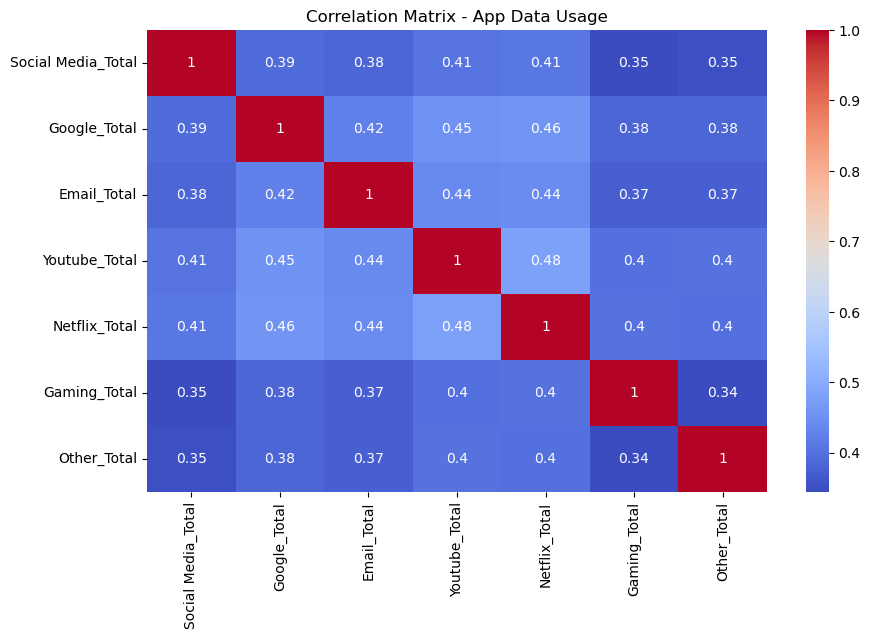

In [43]:
app_total_cols = [f'{app}_Total' for app in apps]
correlation_matrix = user_agg[app_total_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - App Data Usage')
plt.show()


# Dimensionality Reduction using PCA

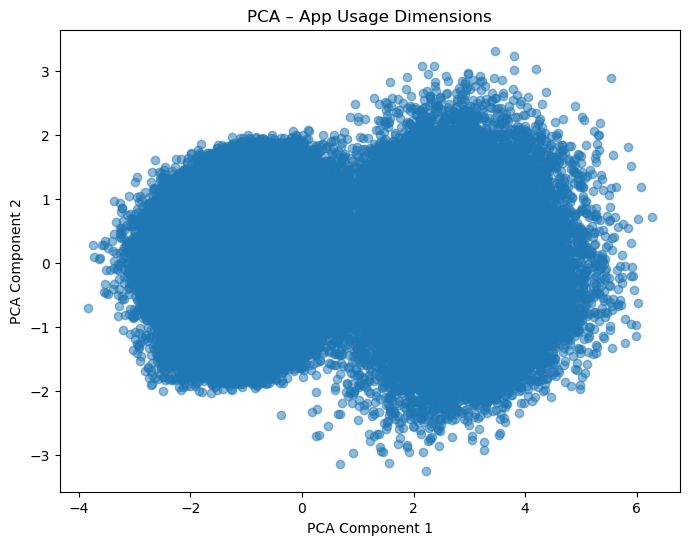

Explained variance by components: [0.48831213 0.09388044]


In [45]:
# Standardize data
X = user_agg[app_total_cols]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# PCA Result Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA – App Usage Dimensions')
plt.show()

# Explained variance
print("Explained variance by components:", pca.explained_variance_ratio_)

1 The PCA revealed that two principal components explain a significant portion of the variance in app usage behavior.

2 Social Media, YouTube, and Netflix data usage contribute strongly to the first component (entertainment-oriented users).

3 Google and Email usage load more on the second component (utility-oriented users).

4 This dimensionality reduction helps in user segmentation and marketing strategy targeting.



In [51]:
# Create a clean user overview file in CSV format
df .to_csv('dataset/user_overview_data.csv',index=False)